In [1]:
import numpy as np
import pImpactR as impact
from copy import deepcopy as copy
import matplotlib.pyplot as plt

In [2]:
input_fname = 'test.original.in'
np.set_printoptions(formatter={'float': lambda x: format(x, '1.2E')})

In [3]:
beam, lattice = impact.readInputFile(input_fname);
ke = beam.kinetic_energy
mass = beam.mass
freq = beam.frequency

reading ImpactZ input file (test.original.in)
  : mpi task info .............................done
  : simulation control parameters .............done
  : space charge field solver, mesh info ......done
  : dist-type,restart,subcycle,#of state ......done
  : Multiple Charge State info ................done
  : particle distribution info ................done
  : beam reference orbit info .................done
  : converting impact dist to twiss param......done
  : lattice info ..............................done


In [4]:
betx = 1.892632003629
alfx = 1.37638192047
emitxN = 0.04902099
beam.distribution.betx = betx
beam.distribution.alfx = alfx
beam.distribution.distribution_type = 'IOTA_Waterbag'
beam.distribution.NL_t = 0.45
beam.distribution.NL_c = 0.009
beam.distribution.emitx = emitxN * beam.distribution.NL_c**2
beam.n_particles = 10000
beam.nCore_y = 8
beam.nCore_z = 4

In [5]:
lattice[0].y = 0.0
lattice.pop(2)
lattice.pop(4)


 file_id: 100
    type: 'write_raw_ptcl'

In [6]:
lattice[2].n_sckick=100

In [7]:
impact.writeInputFile(beam,lattice)
# impact.run(beam)

input error <- sum(beam.multi_charge.n_particles) not qual to beam.n_particles
  ... enforcing  beam.multi_charge.n_particles[0] to beam.n_particles


In [8]:
pDataInit = impact.readParticleData(-111110,ke,mass,freq)

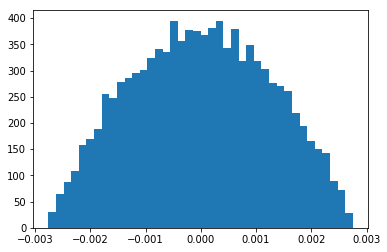

In [9]:
plt.hist(pDataInit[:,0],bins=40);

In [10]:
Inv = np.loadtxt('fort.81')

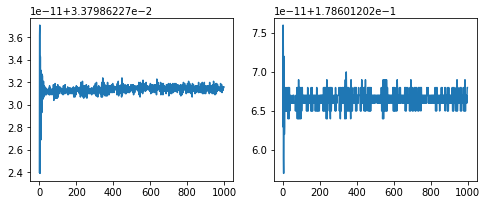

In [11]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(Inv[:,1])
plt.subplot(1,2,2)
plt.plot(Inv[:,2])

In [12]:
emitxN*(2.0/3.0)

0.03268066

In [13]:
lattice[2]


             length: 2.0 [m]
           n_sckick: 100 [1]
              n_map: 100 [1]
         strength_t: 0.45
 transverse_scale_c: 0.009
       tune_advance: 0.3
        pipe_radius: 10.0 [m]
               type: 'nonlinear_insert'